## 卡尔曼滤波 

### 对象：速度v 和位置x

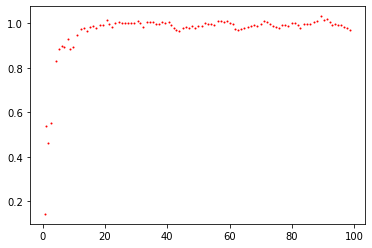

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
# 创建一个0-99的一维矩阵
z = [i for i in range(100)]
z_watch = np.mat(z)
#print(z_mat)
 
# 创建一个方差为1的高斯噪声，精确到小数点后两位
noise = np.round(np.random.normal(0, 1, 100), 2)
noise_mat = np.mat(noise)
 
# 将z的观测值和噪声相加
z_mat = z_watch + noise_mat
#print(z_watch)
 
# 定义x的初始状态
x_mat = np.mat([[0,], [0,]])
# 定义初始状态协方差矩阵
p_mat = np.mat([[1, 0], [0, 1]])
# 定义状态转移矩阵，因为每秒钟采一次样，所以delta_t = 1
f_mat = np.mat([[1, 1], [0, 1]])
# 定义状态转移协方差矩阵，这里我们把协方差设置的很小，因为觉得状态转移矩阵准确度高
q_mat = np.mat([[0.0001, 0], [0, 0.0001]])
# 定义观测矩阵
h_mat = np.mat([1, 0])
# 定义观测噪声协方差
r_mat = np.mat([1])
 
for i in range(100):
    x_predict = f_mat * x_mat
    p_predict = f_mat * p_mat * f_mat.T + q_mat
    kalman = p_predict * h_mat.T / (h_mat * p_predict * h_mat.T + r_mat)
    x_mat = x_predict + kalman *(z_mat[0, i] - h_mat * x_predict)
    p_mat = (np.eye(2) - kalman * h_mat) * p_predict
    
    plt.plot(x_mat[0, 0], x_mat[1, 0], 'ro', markersize = 1)
    
plt.show()